# Astr 19 Final Project 1:

<div class = "alert alert-block alert-info">
    <i>First step is to import the necessary libraries:</i>
</div>  

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import sep
from matplotlib import rcParams
import math
%matplotlib inline

rcParams['figure.figsize'] = [10., 10.]

<div class = "alert alert-block alert-info">
    <i>Next up we read in the data file using astropy.io.fits:</i>
</div>        

In [22]:
rawdata = fits.open("/Users/walkermayer/downloads/image.fits")
data = np.array(rawdata[0].data)

<div class = "alert alert-block alert-info">
    <i>Once we've read the data, we want to show the image. We'll do this using the imshow function in matplotlib.pyplot. </i>
</div>        

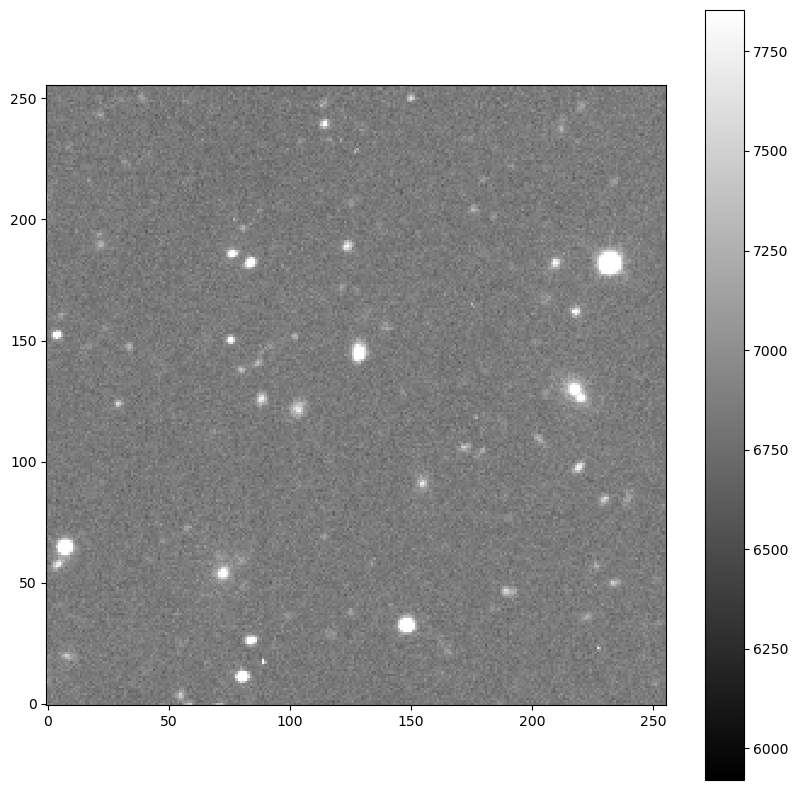

In [23]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower',)
plt.colorbar();
plt.savefig("rawimage.png")
plt.show()

<div class = "alert alert-block alert-info">
    <i>After we produce the image, we need to do some background subtraction to more easily detect sources. We'll do this using the background funtion in sep. </i>
</div> 

In [24]:
# Finding the background
bkg = sep.Background(data)

<div class = "alert alert-block alert-info">
    <i> We can now get a global mean and noise of the background: </i> 
</div> 

In [25]:
bkg_mean = bkg.globalback
bkg_rms = bkg.globalrms

print(bkg_mean)
print(bkg_rms)

6852.04931640625
65.46174621582031


<div class = "alert alert-block alert-info">
    <i> Now we need to make the background into a 2-d array so we can plot the background. Once we do this we'll use imshow() to plot the background. </i> 
</div> 

In [26]:
bkg_image = bkg.back()

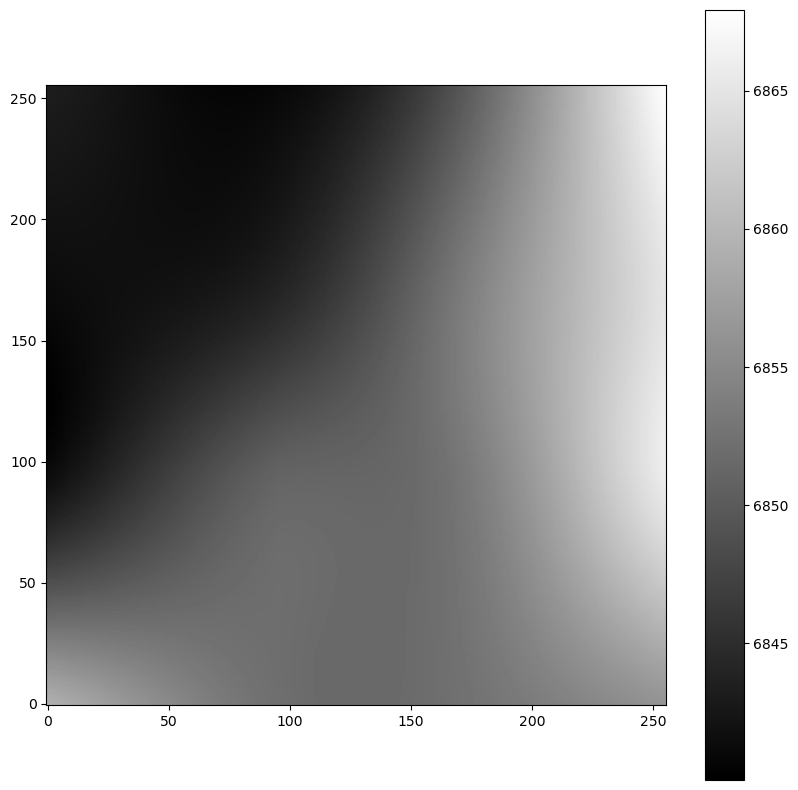

In [27]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig("bkgimage.png")
plt.show()

<div class = "alert alert-block alert-info">
    <i> Now we'll do the same thing with the noise, converting it into a 2-d array so we can plot it. 
    Yet again, we'll use imshow() to plot the noise. </i> 
</div>

In [28]:
bkg_rms = bkg.rms()

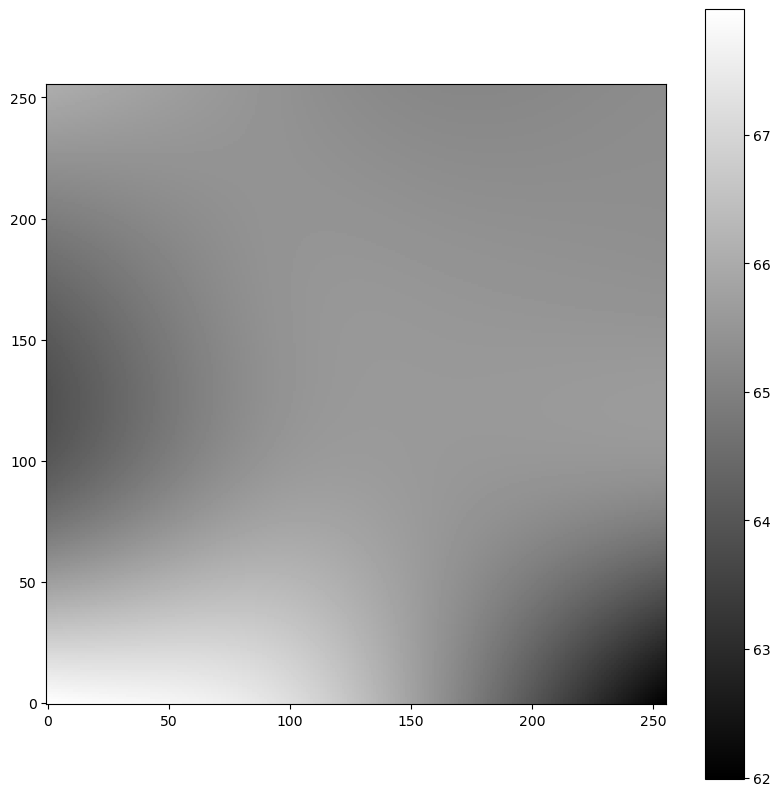

In [29]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig("bkgnoise.png")
plt.show()

<div class = "alert alert-block alert-info">
    <i> The next step is to subtract the background. We do this to help with object detection, which we'll do using the sep.extract function. </i> 
</div>

In [30]:
data_sub = data - bkg

In [31]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

<div class = "alert alert-block alert-info">
    <i> We can now see how many objects were detected, and also produce a plot where each detected object has a red circle showing where it is. </i> 
</div>

In [32]:
print(f'There were {len(objects)} objects detected in this image.')

There were 68 objects detected in this image.


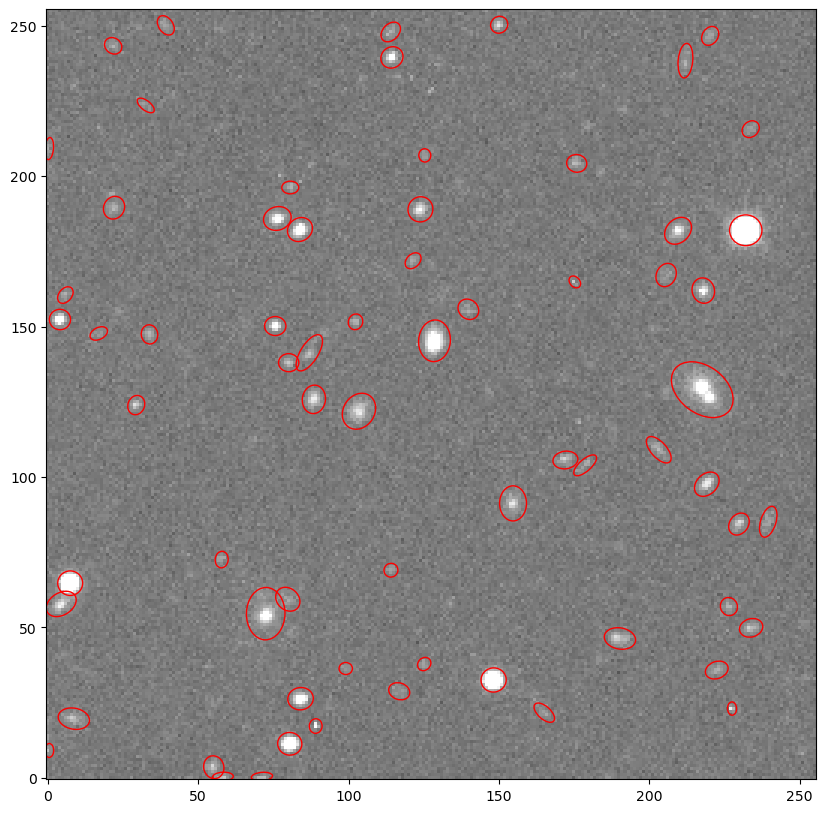

In [33]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig("finalimage.png")

<div class = "alert alert-block alert-info">
    <i> To get the fluxes, we can do some simple aperture photometry and print out the fluxes of each detected object. </i> 
</div>

In [36]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [38]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
